# Assignment 1


---
Samarth Kumar


### README


---

1. You will need the following dependencies:
*   NumPy
*   Matplotlib
*   Pandas
*   IPython.display
*   openpyxl (Required for uploading Excel files with Pandas. See separate instructions below)


2. Openpyxl Installation. Simply run the following command in a separate code cell. The later section of the assignment will already have the command written in a code cell where it is needed so you can just execute that when you get there:
```
%pip install openpyxl
```

3. Upload all required files to the Google Colab runtime:


*   Housing_data_regression.xlsx
*   x_test.npy
*   x_train.npy
*   y_test.npy
*   y_train.npy

4. Now that the files are uploaded and the dependencies are imported, the code is ready to run. Run each code cell in chronological order and everything should work!




In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## **Question 1**

Load Data

In [88]:
# Load the data.
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# X variable must be 2D vector.
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Print the shapes to verify.
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (100, 1)
y_train shape: (100,)
X_test shape: (100, 1)
y_test shape: (100,)


Before implementing any linear regression model, I sought to visualize the dataset itself to determine the kind of relationship present.

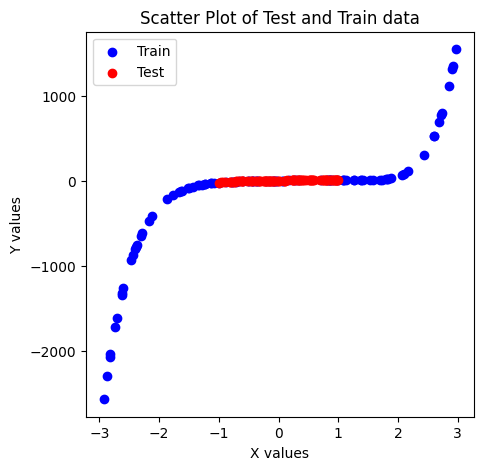

In [89]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Scatter Plot of Test and Train data')
plt.legend(['Train', 'Test'])
plt.show()

The scatter plot above appears to be a non-linear trend, so a simple linear regresion will likely not be sufficient.

### Linear Regression Implementation.


Next, I implemented a linear regression model using normal equations for simplicity.

In [90]:
class LinearRegression():

  def __init__(self):
    self.weights = None
    self.bias = None

  def train(self, X, y):
    m = X.shape[0]
    X = np.c_[np.ones((m, 1)), X]

    # Updating theta with normal equations.
    xTx = np.dot(X.T, X)
    xTy = np.dot(X.T, y)
    theta = np.linalg.inv(xTx).dot(xTy)

    # Set the weights and bias.
    self.bias = theta[0]
    self.weights = theta[1:]

  # Create predictions.
  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  # Calculate loss (mean squared error).
  def mean_squared_error(self, y, y_pred):
    return np.mean((y - y_pred) ** 2)

Run this model with the data.

In [91]:
# Instantiate and train the model using the normal equation.
model = LinearRegression()
model.train(X_train, y_train)

# Make predictions on the data.
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Compute the Mean Squared Error (MSE).
mse_train = model.mean_squared_error(y_train, y_train_pred)
mse_test  = model.mean_squared_error(y_test, y_test_pred)

# Print the Mean Squared Error (MSE) values.
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Print out the linear equation.
print("Linear Equation: y = {:.4f} + {:.4f}x".format(model.bias, model.weights[0]))

Mean Squared Error (Train): 172822.60339569923
Mean Squared Error (Test): 35281.339904469234
Linear Equation: y = -106.1738 + 300.6195x


As you can see from the mean squared error (MSE) values, the MSE for the train data was significantly higher than the MSE for the test data, indicating that the simple linear model generated a poor generalization of the data.

Plot the results for the simple Linear Regression model (both Train and Test)

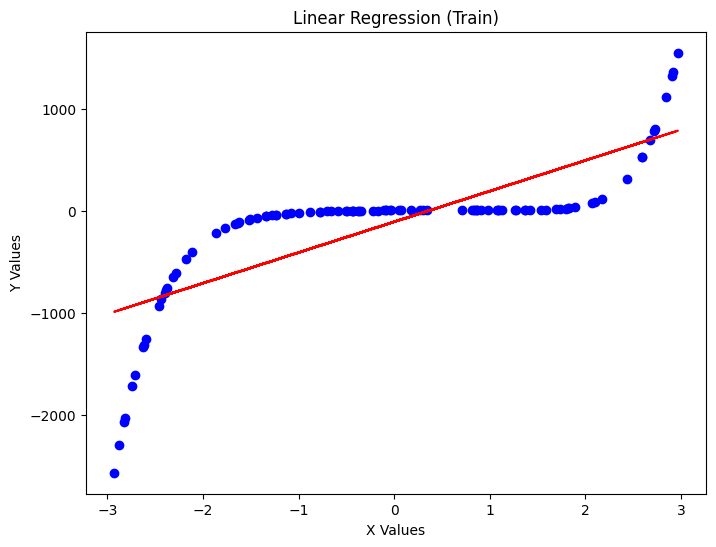

In [92]:
# Train
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression (Train)')
plt.show()

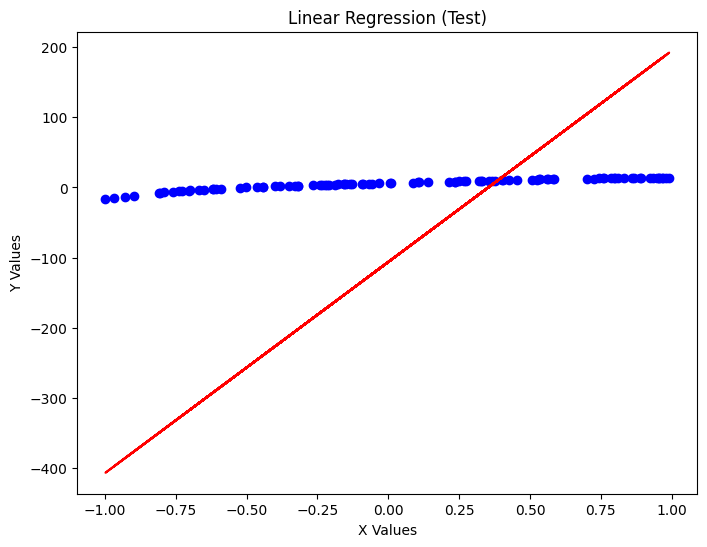

In [93]:
# Test
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression (Test)')
plt.show()

2a) As shown from the graphs above, the relationship is not linear.

2b) Yes, feature engineering to add non-linearity is necessary. The fitted regression line does not fit the data well.
*   i) To engineer these features, X could be transformed by adding polynomial terms. Logarithmic or Exponential transformations could also apply if the data follows trends that resemble them.
*   ii) Since the data (especially train) resembles a cubic polynomial, I applied various polynomial transformations. In this assignment, I tested odd polynomial functions like X\^3, X\^5, and X\^7.

### Polynomial Regression (for Nonlinearity)

In [94]:
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree

    def train(self, X, y):
        # Apply the chosen degree of the polynomial to transform X.
        m = X.shape[0]
        X_poly = np.ones((m, self.degree + 1))
        for d in range(1, self.degree + 1):
            X_poly[:, d] = X[:, 0] ** d

        # Using normal equations for updating theta.
        xTx = X_poly.T.dot(X_poly)
        xTy = X_poly.T.dot(y)
        theta = np.linalg.inv(xTx).dot(xTy)

        return theta

    # Create predictions.
    def predict(self, X, theta):
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        # Transform X for the predictions.
        degree = len(theta) - 1
        X_poly = np.ones((len(X), degree + 1))
        for d in range(1, degree + 1):
            X_poly[:, d] = X[:, 0] ** d

        y_pred = X_poly.dot(theta)

        return y_pred

    # Calculate loss (mean squared error)
    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

### Test the Polynomial Regression model for different degrees

#### 3rd degree

In [95]:
degree=3
polynomial_model = PolynomialRegression(degree)
theta = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train = polynomial_model.predict(X_poly_train, theta)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test = polynomial_model.predict(X_poly_test, theta)

print("Polynomial Equation (Degree = {}) \n".format(degree))
print(f'y = {theta[0]:.4f} + {theta[1]:.4f}*X + {theta[2]:.4f}*X^2 + {theta[3]:.4f}*X^3')

Polynomial Equation (Degree = 3) 

y = 42.2428 + -182.7591*X + -53.5547*X^2 + 86.3192*X^3


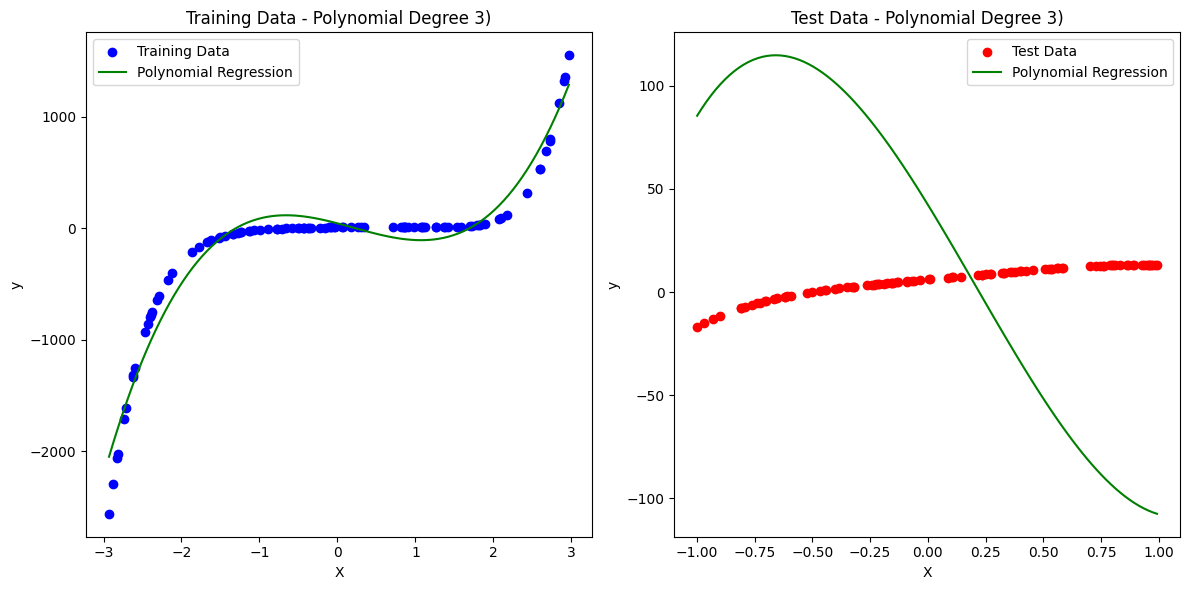

In [96]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train, "g-", label='Polynomial Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Degree {})".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test, "g-", label='Polynomial Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Degree {})".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

Using a 3rd degree polynomial to transform X resulted in a closer fit for the training data. But upon examining the testing data, the model still failed to properly fit the data, so I needed to use a higher degree than 3.

#### 5th degree

In [97]:
degree=5
polynomial_model = PolynomialRegression(degree)
theta2 = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train2 = polynomial_model.predict(X_poly_train, theta2)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test2 = polynomial_model.predict(X_poly_test, theta2)

print("Polynomial Equation (Degree = {}) \n".format(degree))
print(f'y = {theta2[0]:.4f} + {theta2[1]:.4f}*X + {theta2[2]:.4f}*X^2 + {theta2[3]:.4f}*X^3 + 'f'{theta2[4]:.4f}*X^4 + {theta2[5]:.4f}*X^5')

Polynomial Equation (Degree = 5) 

y = 9.6513 + 68.5021*X + -1.5942*X^2 + -55.1795*X^3 + -7.7208*X^4 + 14.4951*X^5


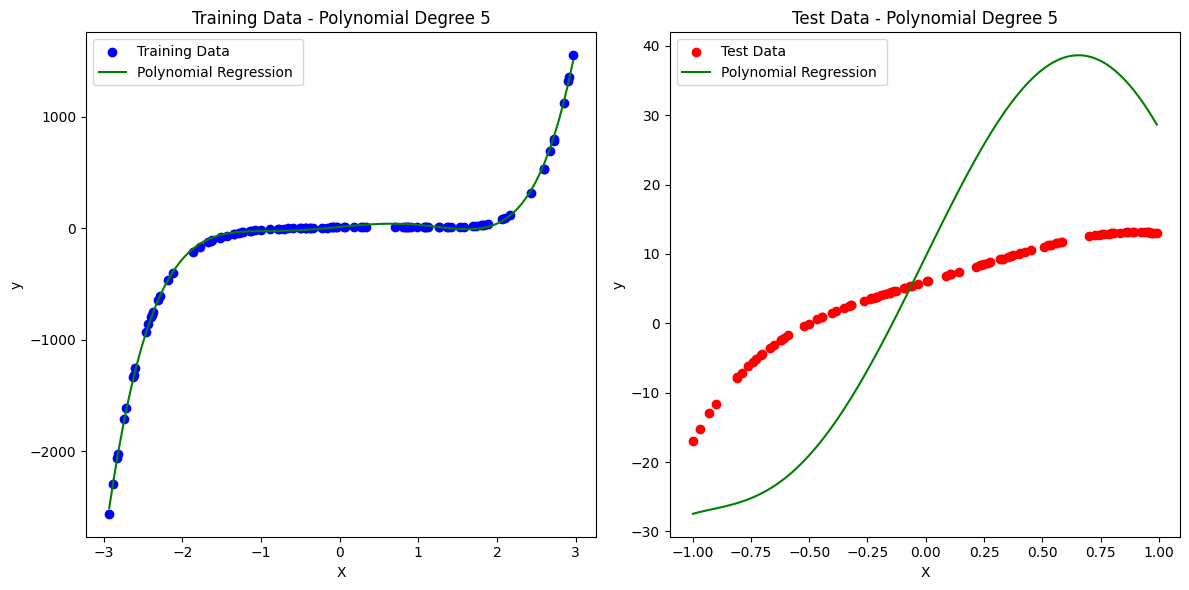

In [98]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train2, "g-", label='Polynomial Regression ')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Degree {}".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test2, "g-", label='Polynomial Regression ')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Degree {}".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

Increasing the polynomial degree to 5 improved the model's ability to generalize the data. When comparing the results of the test data between polynomials of degrees 3 and 5, the 5th degree polynomial had a much closer fit to the data than the 3rd degree polynomial. But, the fit is still not close enough, so a higher degree needs to be implemented.

#### 7th degree

In [99]:
degree=7
polynomial_model = PolynomialRegression(degree)
theta3 = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train3 = polynomial_model.predict(X_poly_train, theta3)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test3 = polynomial_model.predict(X_poly_test, theta3)

print("Polynomial Equation (Degree = {}) \n".format(degree))
print(f'y = {theta3[0]:.4f} + {theta3[1]:.4f}*X + {theta3[2]:.4f}*X^2 + {theta3[3]:.4f}*X^3 + 'f'{theta3[4]:.4f}*X^4 + {theta3[5]:.4f}*X^5 + {theta3[6]:.4f}*X^6 + {theta3[7]:.4f}*X^7')


Polynomial Equation (Degree = 7) 

y = 6.0000 + 10.0000*X + -0.0000*X^2 + 4.0000*X^3 + -8.0000*X^4 + -0.0000*X^5 + -0.0000*X^6 + 1.0000*X^7


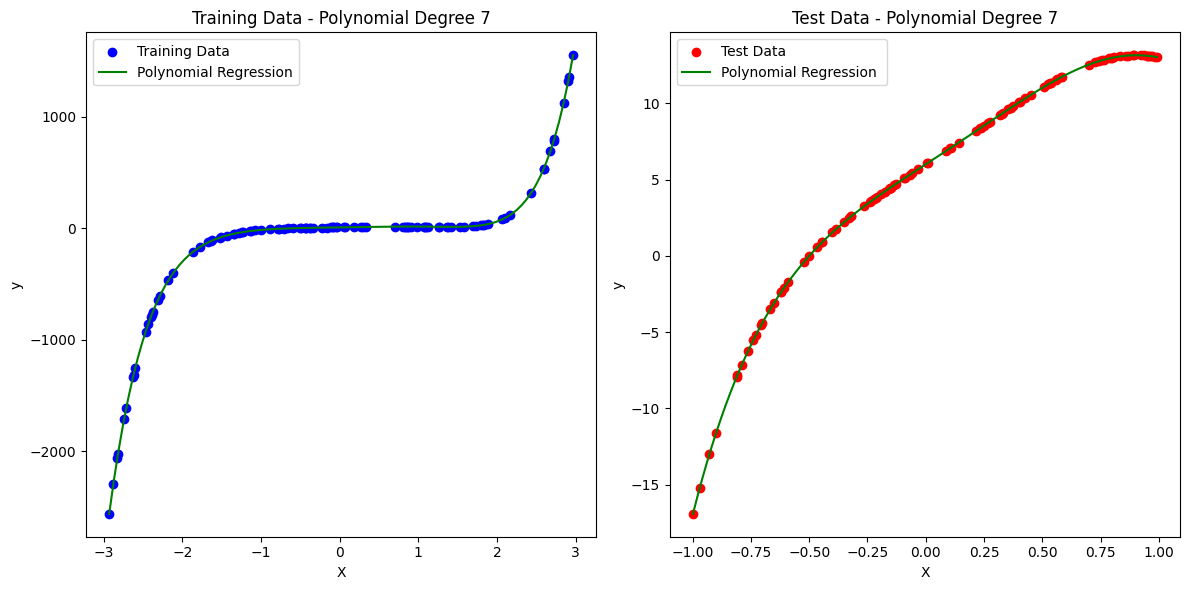

In [100]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train3, "g-", label='Polynomial Regression')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Degree {}".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test3, "g-", label='Polynomial Regression ')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Degree {}".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

Applyng the **7th degree** polynomial feature proved to yield the best fit for the data. The graphs above show that this transformation was able to generalize the test and train data perfectly. The regression (green) aligned perfectly with the training (blue) and testing (red) scatter plots.

After observing the nonlinearity in the original data as well as the simple linear regression model being unable to accurately generalize the data, I implemented polynomial features to add nonlinearity, and found that a polynomial of degree **7** fit the data the best, as shown in the graphs above.

## **Question 2**

Install openpyxl, required for loading Excel files in Pandas dataframes.

In [101]:
%pip install openpyxl

Load the housing data.

In [102]:
# Upload the data from the Excel file, Train and Test are separate sheets.
housing_train = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Train')
housing_test = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Test')

# Train
housing_x_train = housing_train.drop(columns=['House ID', 'Price'])
housing_y_train = housing_train['Price']

# Test
housing_x_test = housing_test.drop(columns=['House ID', 'Local Price'])
# Local Price (different name from Price), was not float by default so I had to type cast.
housing_y_test = housing_test['Local Price'].astype('float')

In [103]:
housing_x_train[0:10]

,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,1.0,3.472,0.998,1.0,7,4,42
1,1.0,3.531,1.500,2.0,7,4,62
2,1.0,2.275,1.175,1.0,6,3,40
3,1.0,4.050,1.232,1.0,6,3,54
4,1.0,4.455,1.121,1.0,6,3,42
5,1.0,4.455,0.988,1.0,6,3,56
6,1.0,5.850,1.240,1.0,7,3,51
7,1.0,9.520,1.501,0.0,6,3,32
8,2.5,9.800,3.420,2.0,10,5,42
9,2.5,12.800,3.000,2.0,9,5,14


In [104]:
housing_y_train[0:10]

,Price
0,491760.0
1,502080.0
2,454290.0
3,455730.0
4,505970.0
5,389100.0
6,589800.0
7,560390.0
8,1642020.0
9,1445980.0


Using the simple linear regression model with Housing data

In [106]:
# Train the model
linear_model = LinearRegression()
linear_model.train(housing_x_train, housing_y_train)

# Make predictions
housing_pred_train = linear_model.predict(housing_x_train)
housing_pred_test = linear_model.predict(housing_x_test)

# Calculate Mean Squared Error (MSE)
mse_train = linear_model.mean_squared_error(housing_y_train, housing_pred_train)
mse_test = linear_model.mean_squared_error(housing_y_test, housing_pred_test)

# Print results
print(f"Comparing MSE for Default (All features included). \n")
print(f"Mean Squared Error (Training Data): {mse_train:.4f}")
print(f"Mean Squared Error (Test Data): {mse_test:.4f}")

Comparing MSE for Default (All features included). 

Mean Squared Error (Training Data): 5006561505.2044
Mean Squared Error (Test Data): 56870641738.0991


1. The average least squares errors using my simple linear regression model are as follows:


*   5006561505.2044 (Training)
*   56870641738.1000 (Testing)



Printing the coefficient values (weights)

Feature Importance:


,Feature,Coefficient Magnitude
2,Living area,228669.130358
0,Bathrooms,209185.845184
4,# Rooms,113529.579242
3,# Garages,47994.959701
1,Land Area,10192.814903
6,Age of home,-2133.473654
5,# Bedrooms,-151116.118299


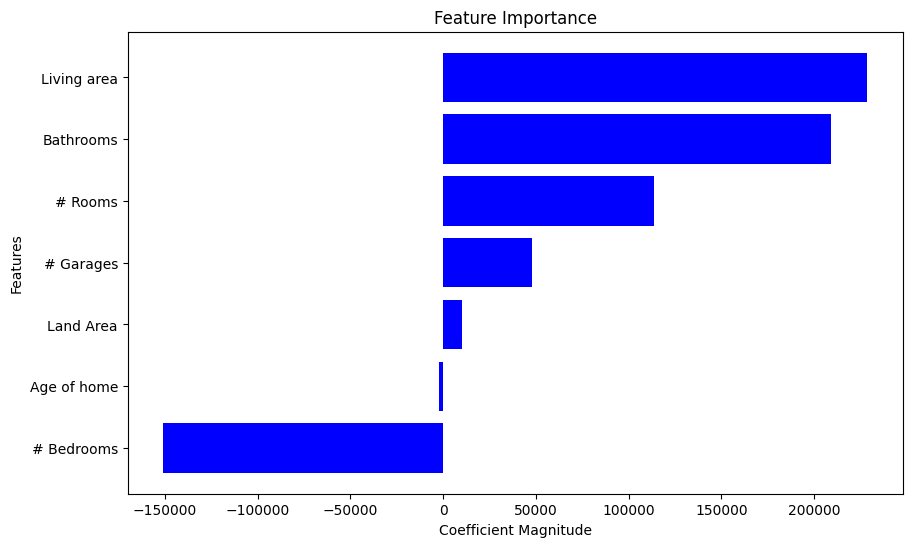

In [107]:
# Create a dataframe using a dictionary pairing the features with their coefficients.
feature_columns = housing_train.drop(columns=['House ID', 'Price']).columns

coefficients = pd.DataFrame({
    "Feature": feature_columns,
     "Coefficient Magnitude": linear_model.weights
})

# Sort them in descending order.
coefficients = coefficients.sort_values(by="Coefficient Magnitude", ascending=False)

# Display the feature importance table.
print("Feature Importance:")
display(coefficients)

# Plot a bar graph for the feature coefficients.
plt.figure(figsize=(10, 6))

plt.barh(coefficients["Feature"],
         coefficients["Coefficient Magnitude"],
         color='blue')

plt.gca().invert_yaxis()
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.show()

Which factor has the most effect on the final value and which factor has the least effect on the final value?
*   Factor with the most impact: **Living Area**
*   Factor with the least impact: **Age of home**

Train the model only using the most significant feature (Living area)

In [108]:
x_train_living = housing_train['Living area']
x_train_living = x_train_living.values.reshape(-1, 1)
y_train_living = housing_train['Price']

x_test_living = housing_test['Living area']
x_test_living = x_test_living.values.reshape(-1, 1)
y_test_living = housing_test['Local Price'].astype('float')

In [109]:
linear_model = LinearRegression()
linear_model.train(x_train_living, y_train_living)

# Make predictions
housing_pred_train = linear_model.predict(x_train_living)
housing_pred_test = linear_model.predict(x_test_living)

# Calculate Mean Squared Error (MSE)
mse_train2 = linear_model.mean_squared_error(y_train_living, housing_pred_train)
mse_test2 = linear_model.mean_squared_error(y_test_living, housing_pred_test)

# Print results
print(f"Comparing MSE when only Living Area feature is used. \n")
print(f"Mean Squared Error (Training Data): {mse_train2:.4f}")
print(f"Mean Squared Error (Test Data): {mse_test2:.4f}")

Comparing MSE when only Living Area feature is used. 

Mean Squared Error (Training Data): 12282616798.3022
Mean Squared Error (Test Data): 93899793656.3500


The MSE grew significantly when Living Area was used as the sole feature.

Train the model by excluding the least significant feature (Age of home)

In [110]:
updated_x_train = housing_train.drop(columns=['House ID', 'Price', 'Age of home'])
updated_y_train = housing_train['Price']

updated_x_test = housing_test.drop(columns=['House ID', 'Local Price', 'Age of home'])
updated_y_test = housing_test['Local Price'].astype('float')

In [111]:
linear_model = LinearRegression()
linear_model.train(updated_x_train, updated_y_train)

# Make predictions
housing_pred_train = linear_model.predict(updated_x_train)
housing_pred_test = linear_model.predict(updated_x_test)

# Calculate Mean Squared Error (MSE)
mse_train3 = linear_model.mean_squared_error(updated_y_train, housing_pred_train)
mse_test3 = linear_model.mean_squared_error(updated_y_test, housing_pred_test)

# Print results
print(f"Comparing MSE after removing Age of home feature. \n")
print(f"Mean Squared Error (Training Data): {mse_train3:.4f}")
print(f"Mean Squared Error (Test Data): {mse_test3:.4f}")

Comparing MSE after removing Age of home feature. 

Mean Squared Error (Training Data): 5318026012.1980
Mean Squared Error (Test Data): 58591058556.9840


The MSE grew slightly when the Age of home feature was removed.

### Compare the results from all three models:


*   Default (All Features)
*   Most Significant Feature
*   Removed Least Significant Feature



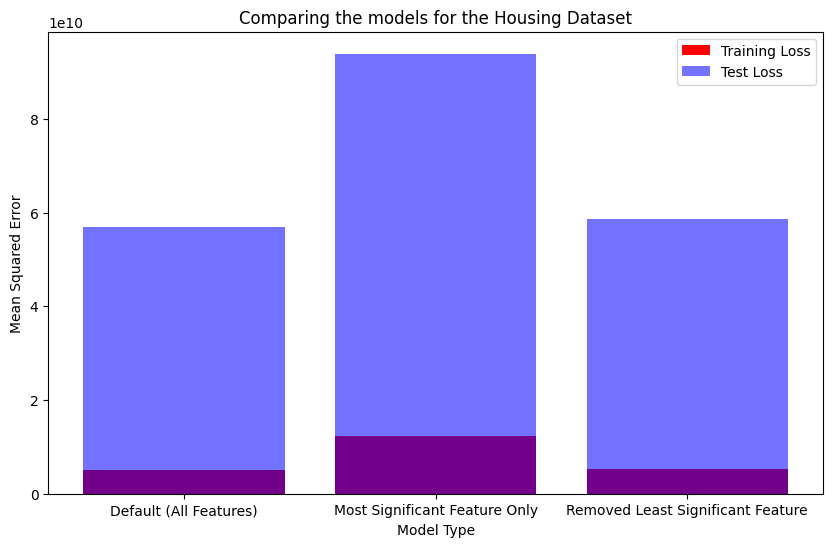

In [112]:
# Bar Graph comparing the losses.
plt.figure(figsize=(10, 6))

training_losses = [mse_train, mse_train2, mse_train3]
test_losses = [mse_test, mse_test2, mse_test3]

features = [
    'Default (All Features)',
    'Most Significant Feature Only',
    'Removed Least Significant Feature'
]

plt.bar(features, training_losses, label='Training Loss', color='red')
plt.bar(features, test_losses, label='Test Loss', color='blue', alpha=0.55)

plt.xlabel('Model Type')
plt.ylabel('Mean Squared Error')
plt.title('Comparing the models for the Housing Dataset')
plt.legend()
plt.show()


2. According to the results above, **Living Area** has the most effect on the final value. By grabbing the the weights for every feature, the coefficient value for Living Area is the greatest in magnitude. The value for this is 228669.13. A higher coefficient magnitude means that the feature has a greater impact on prediction. However, the bar graph above indicates that the mean squared error (MSE) increases significantly when Living Area is the only feature used for creating predictions. Specifically, the MSE increased from 56870641738.0991 to 93899793656.3500. When most features are eliminiated, this likely leads to underfitting, meaning that the model is too simplistic for capturing the complex relationships between the features and housing cost. **Therefore, Living Area cannot be used as the only feature**.

3. **Age of home** has the least effect on the final value, as its coefficient magnitude is significantly lower than that of every other feature. The coefficient magnitude for Age of home is 2133.47. Removing this feature resulted only a slight increase in loss, meaning that it slightly hurts the model's performance. When comparing the test data again, the MSE increased from 56870641738.1000 to 58591058556.9840. This increase is not as drastic as using only Living Area as a feature had. This shows Age of home is still a useful feature since it contributes slightly to the predictions, but its impact is much smaller than features like Bathrooms or # Rooms. **Removing Age of home only has a slight impact on final value.**